# Introduction to Deep Learning with Tensorflow
<br><br><br>

##  Carlos Segura 
<b>
## Associate Researcher @ TID

# What is Tensorflow?

* TensorFlow is a deep learning library
     * open-sourced by Google.
* TensorFlow provides primitives for
defining functions on tensors and
automatically computing their derivatives.

* Python library that can work with symbolic mathematical expressions
    * *Symbolic differentation*: symbolic graphs for computing gradients
* Optimized for multi-dimensional arrays, like numpy.ndarray
    * Tensors
* Same code can work in CPU or GPU

### Installing Tensorflow
* Requirements
    * OS: Linux, Mac OS X, Windows
    * Python: >= 2.7 || >= 3.5
* pip install tensorflow [tensorflow-gpu]
 

## Basic usage:

* Represent computations as graphs
* Execute graphs in the context of sessions
* Represent data as tensors
* Maintain state with Variables
* Use feeds and fetches to get data in and out of graph executions

In [14]:
## Graphs
import tensorflow as tf

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

In [15]:
#To actually multiply the matrices, and get the result of the multiplication, you must launch the graph in a session.
# Launch the default graph.
sess = tf.Session()

# To run the matmul op we call the session 'run()' method, passing 'product'
# which represents the output of the matmul op.  This indicates to the call
# that we want to get the output of the matmul op back.
#
# All inputs needed by the op are run automatically by the session.  They
# typically are run in parallel.
#
# The call 'run(product)' thus causes the execution of three ops in the
# graph: the two constants and matmul.
#
# The output of the op is returned in 'result' as a numpy `ndarray` object.
result = sess.run(product)
print(result)
# ==> [[ 12.]]

# Close the Session when we're done.
sess.close()

[[ 12.]]


In [ ]:
# Sessions should be closed to release resources.
# You can also enter a Session with a "with" block. 
# The Session closes automatically at the end of the with block.


with tf.Session() as sess:
  result = sess.run([product])
  print(result)

In [ ]:
#
with tf.Session() as sess:
  with tf.device("/gpu:1"): #/cpu:0 /gpu:0 /gpu:1 /gpu:2
    matrix1 = tf.constant([[3., 3.]])
    matrix2 = tf.constant([[2.],[2.]])
    product = tf.matmul(matrix1, matrix2)

In [20]:
# Create a Variable, that will be initialized to the scalar value 0.
state = tf.Variable(0, name="counter")

# Create an Op to add one to `state`.

one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

# Variables must be initialized by running an `init` Op after having
# launched the graph.  We first have to add the `init` Op to the graph.
init_op = tf.global_variables_initializer()

# Launch the graph and run the ops.
with tf.Session() as sess:
  # Run the 'init' op
  sess.run(init_op)
  # Print the initial value of 'state'
  print(sess.run(state))
  # Run the op that updates 'state' and print 'state'.
  for _ in range(3):
    sess.run(update)
    print(sess.run(state))


0
1
2
3


In [22]:
#Fetches:
input1 = tf.constant([3.0])
input2 = tf.constant([2.0])
input3 = tf.constant([5.0])
intermed = tf.add(input2, input3)
mul = input1 * intermed

with tf.Session() as sess:
  result = sess.run([mul, intermed])
  print(result)


[array([ 21.], dtype=float32), array([ 7.], dtype=float32)]


In [23]:
#Feeds
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = input1 * input2

with tf.Session() as sess:
  print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))

[array([ 14.], dtype=float32)]


## Linear Regression example

<img src="http://www.atmos.washington.edu/~robwood/teaching/451/labs/images/concepts12.jpg">

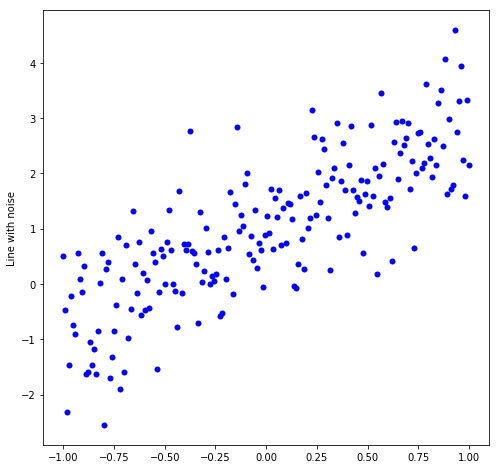

In [24]:
import numpy as np
trainX = np.linspace(-1,1, 200 )
trainY = (2 * trainX + 1.0 + np.random.randn(*trainX.shape)*0.8)

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure( figsize=(8, 8))
plt.plot(trainX, trainY, 'bo', markeredgecolor='none')
plt.ylabel('Line with noise')
plt.show()

In [60]:
import tensorflow as tf


X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
w = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

prediction = X*w + b
loss = tf.reduce_mean(tf.pow(prediction-Y, 2))

var_grads = tf.gradients(loss, [w,b])

learning_rate = tf.constant(0.3)

new_w =  w - var_grads[0] * learning_rate 
new_b =  b - var_grads[1] * learning_rate

update_w = tf.assign(w, new_w)
update_b = tf.assign(b, new_b)

init_op = tf.global_variables_initializer()





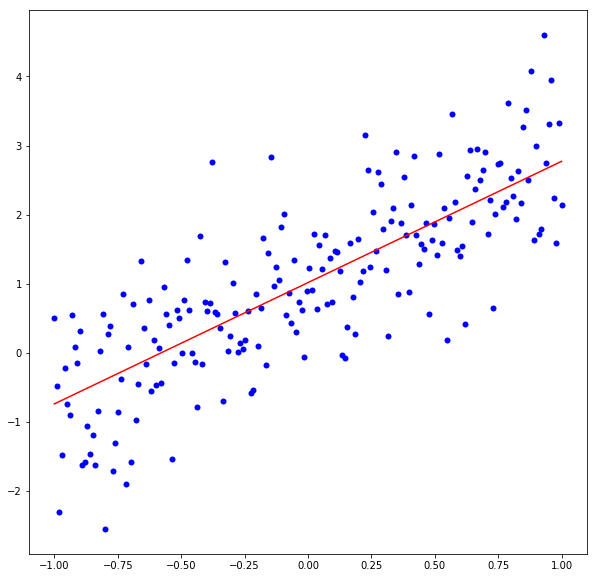

Cost:  0.629377  w: [1.7556236]  b: [1.0156599]


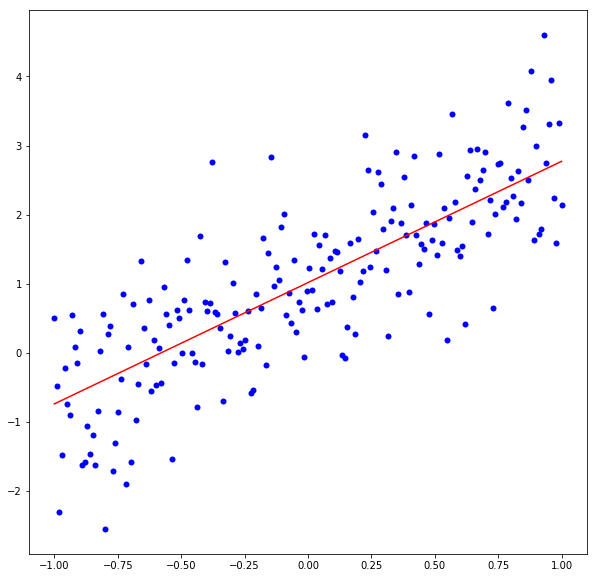

In [64]:
%matplotlib inline
import time
import pylab as plt
from IPython import display

fig = plt.figure( figsize=(10, 10))
with tf.Session() as sess:
    sess.run(init_op)
    for epoch in range(15):
        [current_loss, _, _ ] = sess.run([loss, update_w, update_b ], feed_dict={X:trainX, Y:trainY})
        current_w = sess.run([w])
        current_b = sess.run([b])
        

        plt.clf()
        plt.plot(trainX, trainY,'o',color='b', markeredgecolor='none')
        plt.plot(trainX, trainX*current_w + current_b, color='r',)
        print('Cost: ', current_loss,' w:',current_w, ' b:',current_b)
        display.clear_output(wait=True)
        display.display(plt.gcf())

print('Cost: ', current_loss,' w:',current_w, ' b:',current_b)

## CNN example with MNIST

Dataset of images of handwritten digits like these

<div style="width: 400px">
![esto puede in en el style float:left;](https://www.tensorflow.org/images/MNIST.png)
</div>
 Each image is 28 pixels by 28 pixels. Can be interpreted as a matrix:
<div style="width: 200px">
![MNIST Pixels](https://www.tensorflow.org/images/MNIST-Matrix.png)
</div>

<div style="float:left;width: 400px">
![train ](https://www.tensorflow.org/images/mnist-train-xs.png)
</div>

<div style="float:right;width: 500px">
![1hot labels ](https://www.tensorflow.org/images/mnist-train-ys.png)
</div>
<br><br><br><br><br><br><br><br><br>
Images are = [55000, 28 ,28]    
reshaped into [5500, 784]         

Labels are [55000, 10]
(One-hot encoding of classes)
